Chúc các bạn làm bài tốt!

# Load thư viện

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from abc import abstractmethod

# 1: Implement lại thuật toán Linear Regression

In [95]:
class LinearRegression():
    def __init__(self):
        # Để có thể làm tốt các bài sau, các bạn cần có kiến thức nền tảng về Objects Oriented Programming (OOP)
        # Mình khuyến khích bài post này:

        # Giải thích đơn giản về OOP     
        # https://www.freecodecamp.org/news/object-oriented-programming-concepts-21bb035f7260/

        # OOP trong Python         
        # https://realpython.com/python3-object-oriented-programming/
        # https://www.geeksforgeeks.org/abstract-classes-in-python/
        super().__init__()
        self.coefficients = None
    
    def fit(self,X,y):
        # Hàm fit sẽ là nơi chứa logic của thuật toán Linear Regression
        # Các bạn hay xoá "..." ở phía dưới đây, và implement code         
        # prepare X
        X = np.insert(X, 0, 1, axis = 1)
        #compute coefficients of the linear regression model
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
        
    def predict(self,X):
        # Như tên của hàm, đây là nơi để các bạn dự đoán dữ liệu
        # Như hướng dẫn phía trên, hãy xoá "..." ở phía dưới đây,
        # và implement code dự đoán.          
        X = np.insert(X, 0, 1, axis = 1)
        #make predictions
        y_pred = np.dot(X, self.coefficients)
        return y_pred

# 2a: Fit dữ liệu trong file linear.csv và visualize

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
df = pd.read_csv('/content/drive/MyDrive/pandas/data_linear.csv')

In [98]:
print(df)

    Diện tích       Giá
0     30.0000   448.524
1     32.4138   509.248
2     34.8276   535.104
3     37.2414   551.432
4     39.6552   623.418
5     42.0690   625.992
6     44.4828   655.248
7     46.8966   701.377
8     49.3103   748.918
9     51.7241   757.881
10    54.1379   831.004
11    56.5517   855.409
12    58.9655   866.707
13    61.3793   902.545
14    63.7931   952.261
15    66.2069   995.531
16    68.6207  1069.780
17    71.0345  1074.420
18    73.4483  1103.880
19    75.8621  1138.690
20    78.2759  1153.130
21    80.6897  1240.270
22    83.1034  1251.900
23    85.5172  1287.970
24    87.9310  1320.470
25    90.3448  1374.920
26    92.7586  1410.160
27    95.1724  1469.690
28    97.5862  1478.540
29   100.0000  1515.280


In [99]:
X = df['Diện tích'].values.reshape(-1,1) #reshape into matrix
y = df['Giá'].values

In [100]:
reg = LinearRegression()
reg.fit(X,y)
y_pred = reg.predict(X)

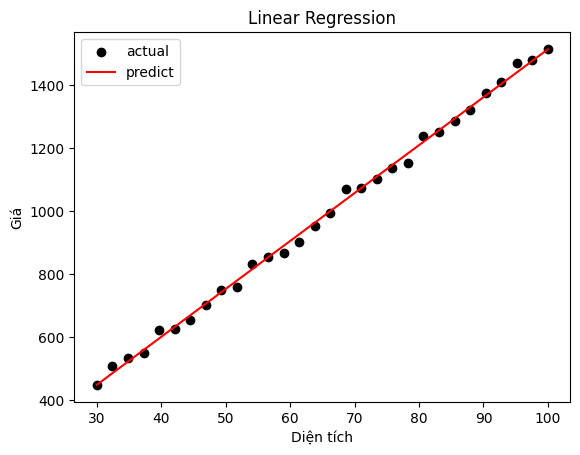

In [101]:
#visualization
plt.scatter(X, y, color='black', label = 'actual')
plt.plot(X, y_pred, color='red', label = 'predict')
plt.title('Linear Regression')
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.legend()
plt.show()

# 2b: Tính loss Root Mean Squared Error - RMSE

In [102]:
def rmse(y,y_pred):
  return np.sqrt(np.mean((y - y_pred) ** 2))
rmse(y,y_pred)

15.704135712961873

# 3a: Fit dữ liệu trong file nonLinear.csv 

In [103]:
df2 = pd.read_csv('/content/drive/MyDrive/pandas/nonLinear.csv')
df2.head()

Diện tích  Giá nhà
0    30.0000 -100.000
1    32.4138 -190.725
2    34.8276 -269.798
3    37.2414 -337.218
4    39.6552 -392.985

In [104]:
X2 = df2['Diện tích'].values.reshape(-1,1) #reshape into matrix
y2 = df2['Giá nhà'].values

In [105]:
reg.fit(X2, y2)
y_pred2 = reg.predict(X2)

# 3b: Visualize kết quả

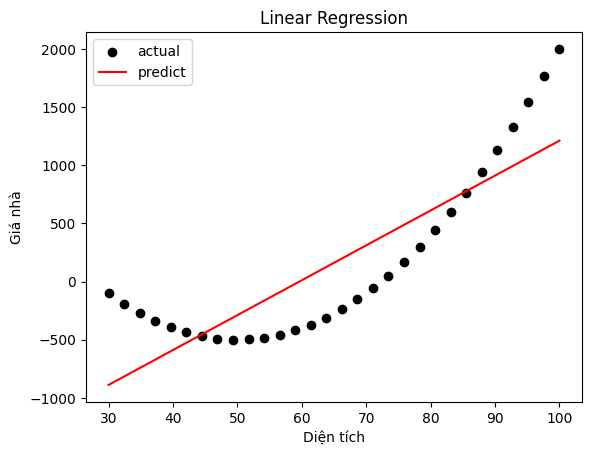

In [106]:
#visualization
plt.scatter(X2, y2, color='black', label = 'actual')
plt.plot(X2, y_pred2, color='red', label = 'predict')
plt.title('Linear Regression')
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà')
plt.legend()
plt.show()

# 3c: Nhận xét

doesnt fit, should add more features to improve model

# 4: Cải thiện model

In [107]:
class LinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        X = np.insert(X, 1, X[:,0]**2, axis=1)
        # thêm cột x^2 trước
        X = np.insert(X, 0, 1, axis=1)
        # sau đó thêm cột 1 vào đầu (axis = 1) ma trận X để nhân được Xw
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
        #tính tham số w khi đạo hàm = 0
        #@ nhân ma trận
        #linalg.inv: linear algebra invert

    def predict(self, X):
        X = np.insert(X, 1, X[:,0]**2, axis=1)
        X = np.insert(X, 0, 1, axis=1) 
        # thêm cột 1 vào ma trận X để tính hệ số tự do
        return X @ self.coefficients

# 5: Thử nghiệm với dữ liệu sample.csv

In [108]:
X2 = df2['Diện tích'].values.reshape(-1,1) #reshape into matrix
y2 = df2['Giá nhà'].values

In [109]:
reg2 = LinearRegression()

reg2.fit(X2,y2)
y_pred3 = reg2.predict(X2)

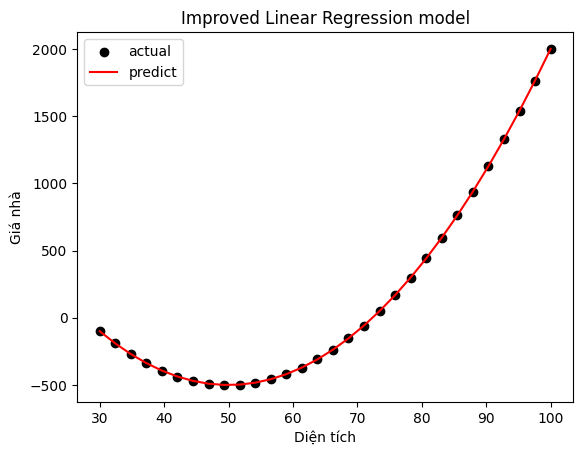

In [110]:
plt.scatter(X2, y2, color='black', label = 'actual')
plt.plot(X2, y_pred3, color='red', label = 'predict')
plt.title('Improved Linear Regression model')
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà')
plt.legend()
plt.show()